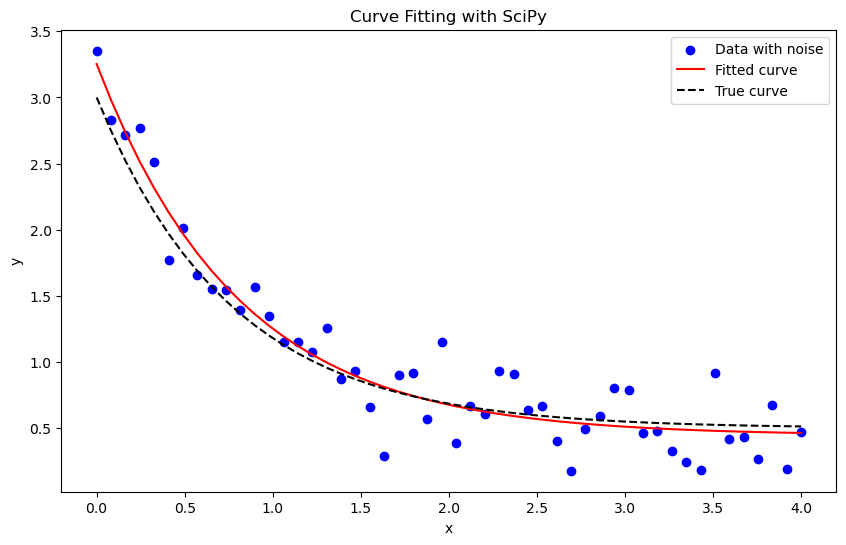

Fitted parameters: [2.80720814 1.24568448 0.44517316]
Covariance matrix of the parameters:
 [[ 0.01578368  0.00531404 -0.00098382]
 [ 0.00531404  0.01540053  0.00546017]
 [-0.00098382  0.00546017  0.00345199]]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 임의의 비선형 함수 정의 (예: 지수 함수)
def model_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# 데이터 생성
np.random.seed(0)
x_data = np.linspace(0, 4, 50)
# 실제 파라미터로 데이터 생성 (노이즈 포함)
a_true, b_true, c_true = 2.5, 1.3, 0.5
y_data = model_func(x_data, a_true, b_true, c_true) + 0.2 * np.random.normal(size=len(x_data))

# 비선형 곡선 피팅
popt, pcov = curve_fit(model_func, x_data, y_data, p0=(1, 1, 1))

# 피팅 결과로 y값 계산
y_fit = model_func(x_data, *popt)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='Data with noise')
plt.plot(x_data, y_fit, color='red', label='Fitted curve')
plt.plot(x_data, model_func(x_data, a_true, b_true, c_true), 'k--', label='True curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Curve Fitting with SciPy')
plt.show()

# 피팅 결과 출력
print("Fitted parameters:", popt)
print("Covariance matrix of the parameters:\n", pcov)

# Least-Squares Curve Fitting Method

최소제곱근사법

$$
\text{arg}\min_{\beta} \sum_{i=1}^{n}(|\vec{y} - \mathbf{X}\vec{\beta}|)^2 
$$

$$
d(x_i) \equiv |f(x_i) - g(x_i)|
$$

$$
E_L = \sum_{i=1}^n d(x_i) = \sum_{i=1}^n |f(x_i) - g(x_i)|
$$

$$
E_S = \sum_{i=1}^n d^2(x_i) = \sum_{i=1}^n |f(x_i) - g(x_i)|^2
$$

$E_S$가 $E_L$보다 작은 차이를 더 잘 감지한다. 편차에 제곱을 해서 작은 차이를 크게 벌려놓아 수치적으로 더 정확한 판별이 가능하다.

Curve fit이란 위와 같은 오차들을 최소화하는 계수를 찾아 함수식을 세우는 것이다.

$$
g(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_m x^m
$$

$$
E = \sum |A(x_i)|^2 = \sum | f(x_i) - g(x_i)|^2 =\sum | g(x_i)- f(x_i) |^2
$$

여기서:
- $g(x) = a_0 + a_1 x + a_2 x^2 + \cdots a_m x^m$ 의 $m$차 다항식

$$
= \sum | a_0 + a_1x_i + a_2 x_i^2 + \cdots + a_m x^m_i - f(x_i)|^2
$$

1계 미분 도함수의 값이 0이면 거기가 최소 또는 최대점임을 이용:

$$
\frac{\partial E}{\partial a_0}=0, \frac{\partial E}{\partial a_1}=0, \cdots, \frac{\partial E}{\partial a_m}=0
$$

$m+1$ 개의 조건을 만족하는 $a$ 들을 결정하는 문제

$$
\frac{\partial E}{\partial a_0}=0 \\
\frac{\partial E}{\partial a_0}= \frac{\partial E}{\partial a_0}\sum [a_0 + a_1 x_i + \cdots + a_m x_i^m - f(x_i)]^2
$$

$$
= 2\sum[a_0 + a_1 x_i + \cdots a_m x^m_i - f(x_i)]^2 \frac{\partial}{\partial a_0}[a_0 + a_1 x_i + \cdots a_m x_i^m f(x)]
$$

그런데 미분기호 뒤쪽의 대괄호에서 $a_0$와 상관없는 나머지 항들은 전부 0이 되고, $a_0$만 단독으로 있는 항은 1이 된다.

$$
= 2\left[\sum a_0 + \sum a_1x_i + \cdots \sum a_m x_i^m - \sum f(x_i) \right] \equiv 0
$$

$$
\to a_0 (n) + a_1 \left(\sum x_i \right) + \cdots + a_m \left(\sum x_i^m\right) = \sum f(x_i)
$$

$a_0$ 부터 $a_m$ 까지 $m+1$ 개의 미지수로 구성된 __선형 연립방정식__ 이 된다.

마찬가지로 편미분하면:

$$
\frac{\partial E}{\partial a_1} =0 \\
\to a_0 \sum x_i + a_1 \sum x_i^2 + \cdots +a_m \sum x_i^{m+1} = \sum f(x_i) x_i
$$

일반화:
$$
\frac{\partial E}{\partial a_j} = 0\\
\to a_0 \sum x^j_i + a_1 \sum x_i^{j+1} + \\\cdots + a_j \sum x_i^{j+j} + \cdots + a_m \sum x_i^{m+j} = \sum f(x_i) x_i^j
$$

__행렬식__:

$$
\begin{bmatrix}
\sum 1 & \sum x_i & \cdots & \sum x_i^m \\
\sum x_i & \sum x_i^2& \cdots & \sum x_i^{m+1}\\
\vdots &&\vdots\\
\sum x_i^m & \sum x_i^{m+1}& \cdots & \sum x_i^{2m}
\end{bmatrix}
\begin{bmatrix}
a_0 \\ a_1 \\ \vdots \\ a_m
\end{bmatrix}
=\begin{bmatrix}
\sum f(x_i) \\ \sum f(x_i) x_i \\ \vdots \\ \sum f(x_i)x_i^m
\end{bmatrix}
$$

## 예제

### 교재 151p 예제

In [23]:
import numpy as np

x = np.array([[1,1,1,1,1], [2.21, 5.8, 6.95, 11.12, 14.21]]).reshape(-1,2)
fx = np.array([2.71, 4.25, 6.02, 5.82, 8.21]).reshape(-1,1)

a = np.linalg.solve(x.T @ x, x.T @ fx)
print(f'a0: {a[0]}, a1: {a[1]}, Error: {np.sum(((x@a) - fx)**2)}')

a0: [-2.25947462], a1: [2.46975503], Error: 36.723014649275946


__1차 다항식__

```C
A[0][0]=5.000000	
A[1][0]=40.290000	
A[0][1]=40.290000	
A[1][1]=412.405100	
A[0][2]=27.010000	
A[1][2]=253.860600	

x0=2.076435	
x1=0.412703	
 	
g(x)=(2.076435)+(0.412703)*x	
```

In [24]:
np.sum((x @ np.array([2.076435, 0.412703]) - fx)**2)

np.float64(3424.8065245670045)

__2차 다항식__

```C
A[0][0]=5.000000	
A[1][0]=40.290000	
A[2][0]=412.405100	
A[0][1]=40.290000	
A[1][1]=412.405100	
A[2][1]=4785.986625	
A[0][2]=412.405100	
A[1][2]=4785.986625	
A[2][2]=59552.388339	
A[0][3]=27.010000	
A[1][3]=253.860600	
A[2][3]=2824.452430	

x0=1.757628	
x1=0.515203	
x2=-0.006148	
 	
g(x)=(1.757628)+(0.515203)*x+(-0.006148)*x^2 	
```

### 교재 152p 예제

$$
g(x) = a_0 + a_1x + a_2 x^2 + a_3 x^3
$$

In [25]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0.0,1.0,1.4,2.4,2.6,4.0,5.2,6.1,6.4,7.0,8.2,9.0
               ,9.4,11.0,11.4,12.2,13.2,14.0,15.4,16.0,17.6,17.9,19.0,20.0]).reshape(-1,1)
y = np.array([0.1,0.9,2.4,2.6,3.7,4.2,3.2,5.2,3.3,2.3,1.4,1.9
               ,-0.4,-1.4,-2.9,-4.1,-4.8,-3.9,-5.1,-2.9,-3.7,-1.7,-1.3,-0.2]).reshape(-1,1)

dX = np.hstack([np.repeat(1, 24).reshape(-1,1),X, X**2, X**3])

plt.scatter(X, y, c='r')
plt.show()

In [26]:
beta = np.linalg.inv(dX.T @ dX) @ dX.T @ y
beta

array([[-0.3537443 ],
       [ 2.31520911],
       [-0.35360484],
       [ 0.01204272]])

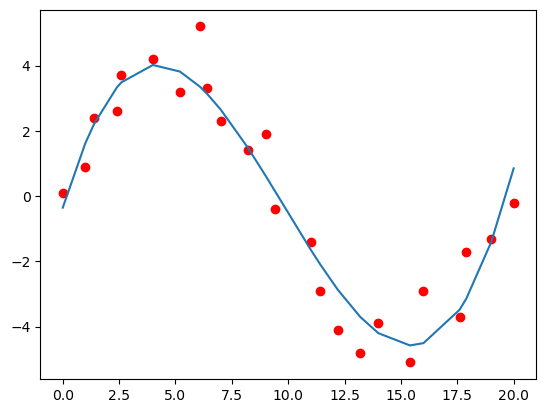

In [27]:
plt.scatter(X, y, c='r')
plt.plot(X, dX@beta)
plt.show()

```C
x0=-0.353744	
x1=2.315209	
x2=-0.353605	
x3=0.012043	
 	
g(x)=(-0.353744)+(2.315209)*x+(-0.353605)*x^2+(0.012043)x^3
```

### Chapra PROBLEMS 15.3

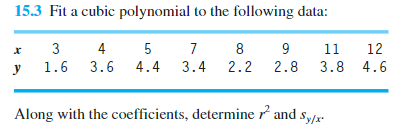

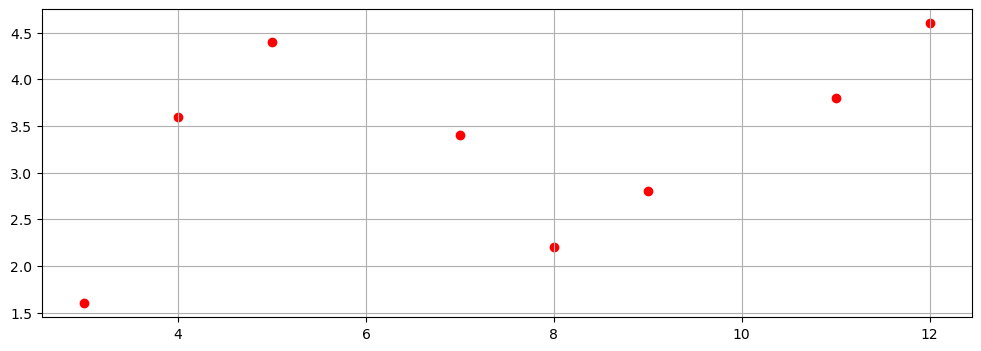

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([3, 4, 5, 7, 8, 9 , 11, 12]).reshape(-1,1)
y = np.array([1.6, 3.6, 4.4, 3.4, 2.2, 2.8, 3.8, 4.6]).reshape(-1,1)

plt.figure(figsize=(12,4))
plt.scatter(x, y, c='r')
plt.grid()
plt.show()

In [29]:
design_x = np.hstack([np.repeat(1, 8).reshape(-1,1), x, x**2, x**3])
beta = np.linalg.pinv(design_x.T @ design_x) @ design_x.T @ y
beta

array([[-11.48870718],
       [  7.14381722],
       [ -1.04120692],
       [  0.04667602]])

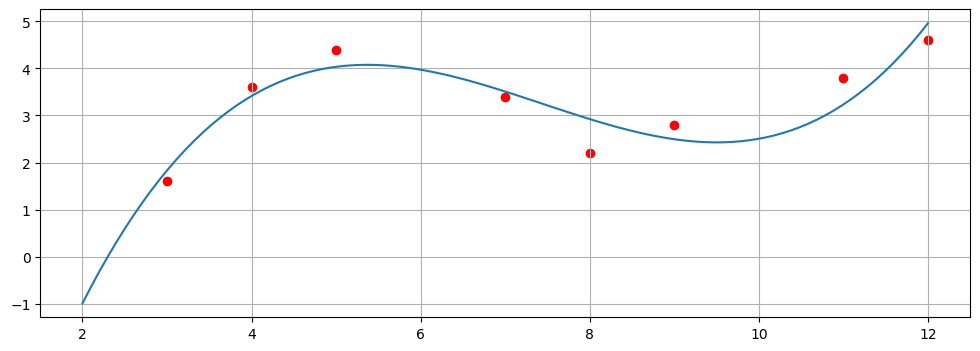

In [30]:
plt.figure(figsize=(12,4))
plt.scatter(x, y, c='r')
plt.plot(np.linspace(2, 12, 100).reshape(-1,1), 
         np.hstack([np.repeat(1, 100).reshape(-1,1),
                    np.linspace(2, 12, 100).reshape(-1,1),
                    np.linspace(2, 12, 100).reshape(-1,1)**2,
                    np.linspace(2, 12, 100).reshape(-1,1)**3])
         @beta)
plt.grid()
plt.show()

```C
x0=-11.488707	
x1=7.143817	
x2=-1.041207	
x3=0.046676	
 	
g(x)=(-11.488707)+(7.143817)*x+(-1.041207)*x^2+(0.046676)*x^3
```

### Chapra PROBLEMS 15.5

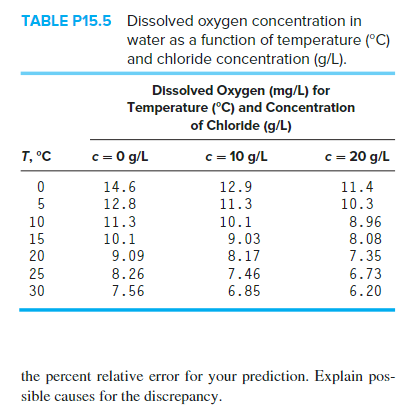

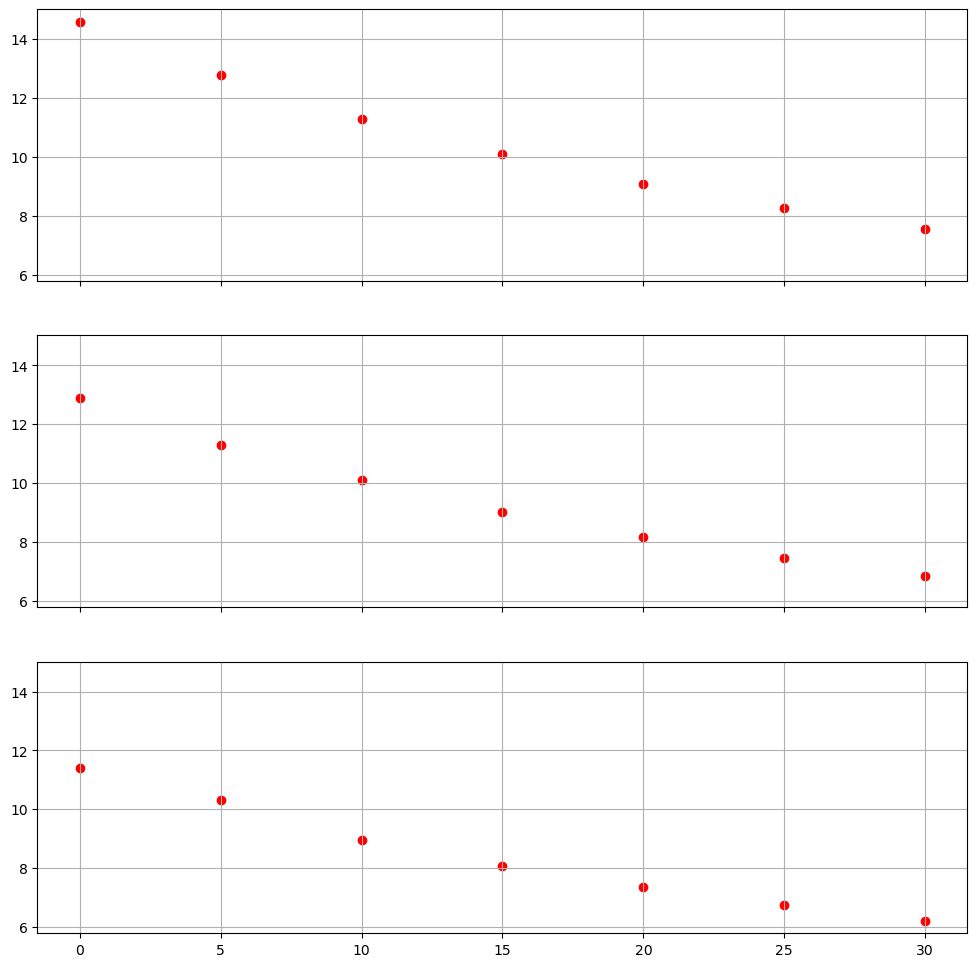

In [31]:
import numpy as np
import matplotlib.pyplot as plt

T = np.array([0, 5, 10, 15, 20, 25, 30]).reshape(-1,1)
c0 = np.array([14.6, 12.8, 11.3, 10.1, 9.09, 8.26, 7.56]).reshape(-1,1)
c10 = np.array([12.9, 11.3, 10.1, 9.03, 8.17, 7.46, 6.85]).reshape(-1,1)
c20 = np.array([11.4, 10.3, 8.96, 8.08, 7.35, 6.73, 6.20]).reshape(-1,1)

fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True,
                       figsize=(12,12))

ax[0].scatter(T, c0, c='r')
ax[0].grid()
ax[1].scatter(T, c10, c='r')
ax[1].grid()
ax[2].scatter(T, c20, c='r')
ax[2].grid()
plt.show()

In [32]:
desT = np.hstack([np.repeat(1, 7).reshape(-1,1), T, T**2])
c = np.hstack([c0, c10, c20])
beta = np.linalg.inv(desT.T @ desT) @ desT.T @ c
beta

array([[ 1.45519048e+01,  1.28411905e+01,  1.14421429e+01],
       [-3.63357143e-01, -3.10000000e-01, -2.70357143e-01],
       [ 4.39523810e-03,  3.72380952e-03,  3.21428571e-03]])

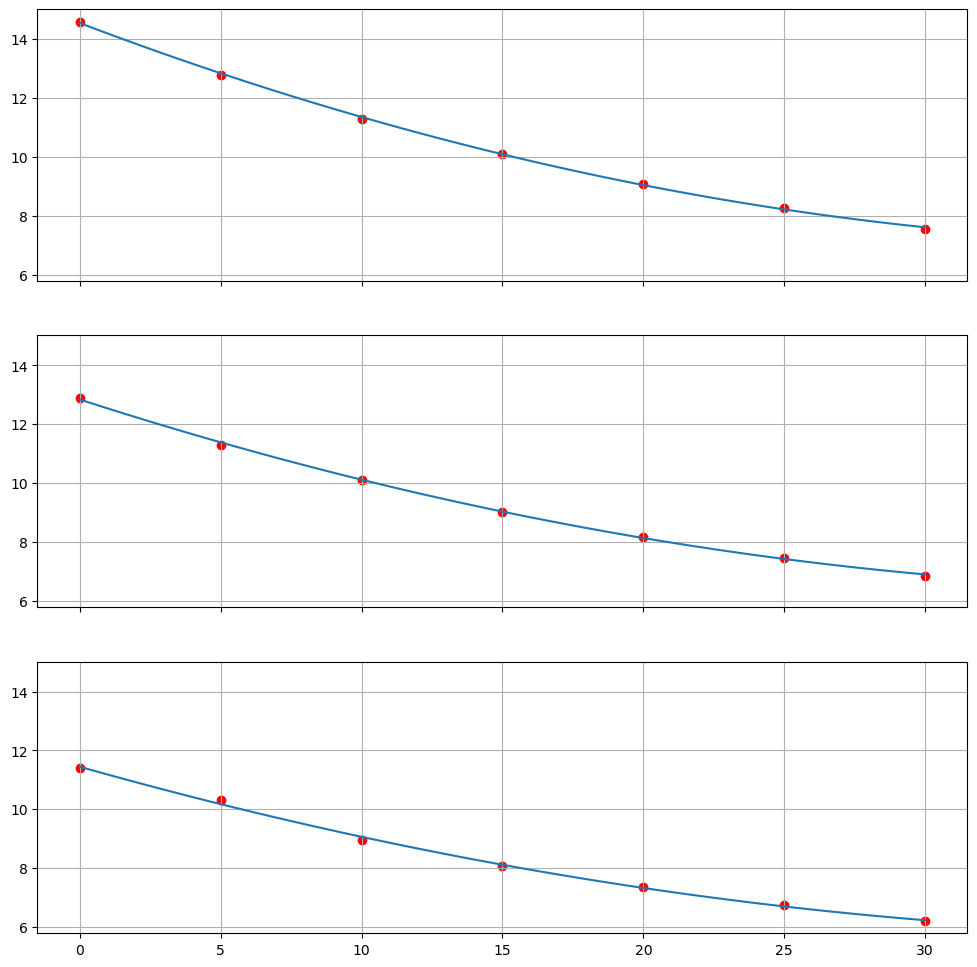

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True,
                       figsize=(12,12))

nullT = np.hstack([np.repeat(1, 100).reshape(-1,1), 
                   np.linspace(0, 30, 100).reshape(-1,1),
                   np.linspace(0, 30, 100).reshape(-1,1)**2])

ax[0].scatter(T, c0, c='r')
ax[0].plot(nullT[:,1], nullT@beta[:,0])
ax[0].grid()
ax[1].scatter(T, c10, c='r')
ax[1].plot(nullT[:,1], nullT@beta[:,1])
ax[1].grid()
ax[2].scatter(T, c20, c='r')
ax[2].plot(nullT[:,1], nullT@beta[:,2])
ax[2].grid()
plt.show()